In [27]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline


### Define the data

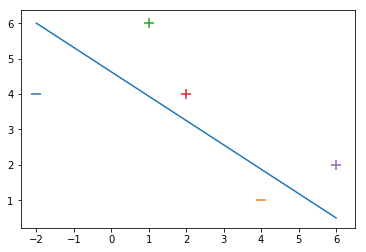

In [28]:
# Input data: X_point, Y_point, bias
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1]
])

# Associated labels

Y = np.array([-1, -1, 1, 1, 1])

#lets plot these examples on a 2D graph!
#for each example
for d, sample in enumerate(X):
    # Plot the negative samples (the first 2)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples (the last 3)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
#we'll two points and draw the line between them (naive guess)
plt.plot([-2,6],[6,0.5])


### Perfrom svm_sgd

In [29]:
def svm_sgd_plot(X, y):
    w = np.zeros(len(X[0]))
    eta = 1  # Learning rate
    epochs = 100000
    errors = []  # Just for visualization
    
    lambda_ = 1 / epochs
    
    for epoch in range(1, epochs + 1):
        error = 0
        for idx, x in enumerate(X):
            # Misclassification
            if (Y[idx] * np.dot(X[idx], w) < 1):
                w = w + eta * (Y[idx] * X[idx] - (2 * lambda_ * w))
                error = 1
            else:
                w = w + eta * (-2 * lambda_ * w)
        errors.append(error)
        
    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

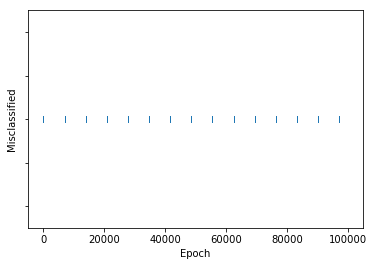

In [30]:
w = svm_sgd_plot(X, Y)

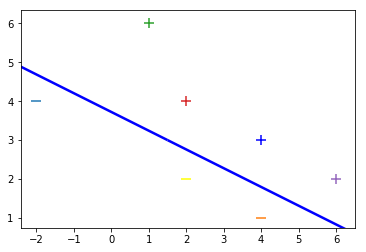

In [31]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')